# Problem 3

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as smo
import patsy as pt
import statsmodels.stats.api as sms
from simple_colors import *
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import truncnorm
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [4]:
#read data
df = pd.read_csv("weekly.csv")
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [6]:
# Encode the target variable 'Direction'
# 1 if 'Up', 0 if 'Down'
df['Direction'] = df['Direction'].apply(lambda x: 1 if x == 'Up' else 0)

In [7]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [14]:
# Select predictors
X = df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]

# Target variable
y = df['Direction']

# Fit the logistic regression model
logit_model = LogisticRegression()
logit_model.fit(X, y)

# Coefficients and intercept
coefficients = logit_model.coef_[0]
intercept = logit_model.intercept_[0]

# Output the coefficients and intercept
print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [-0.04123854  0.05840384 -0.01605138 -0.02776243 -0.01446302 -0.02270963]
Intercept: 0.26680421889910433


### a) The Coefficients above shows average change of log-odds of the stock moving up if one independent variable changes 1 unit given other variables remain constant. The Intercept represents the log-odds of the stock moving up when all the variables are equal to zero.

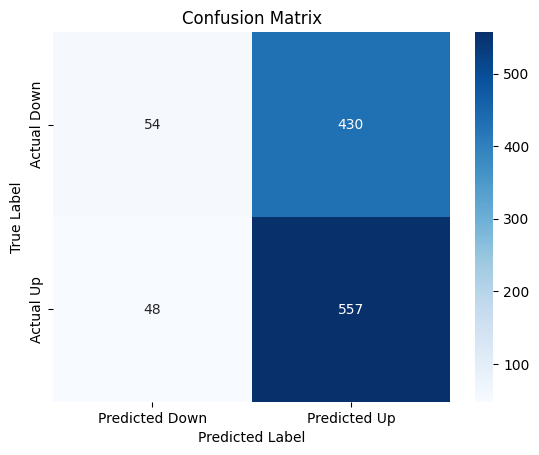

Confusion Matrix:
 [[ 54 430]
 [ 48 557]]
Accuracy: 0.5610651974288338
Precision: 0.5643363728470111
Recall: 0.9206611570247933
F1 Score: 0.6997487437185929


In [18]:
# Predictions
y_pred = logit_model.predict(X)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Calculate precision
precision = precision_score(y, y_pred)

# Calculate recall
recall = recall_score(y, y_pred)

# Calculate F1 score
f1 = f1_score(y, y_pred)

# Output the performance metrics
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Predicted Down', 'Predicted Up'], 
            yticklabels=['Actual Down', 'Actual Up'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


### b) From the ratios above Recall > Precious > Accruracy > 50% while 50% represents average performance of random guessing. Hence, the model beats random guessing in terms of these performance metrics.

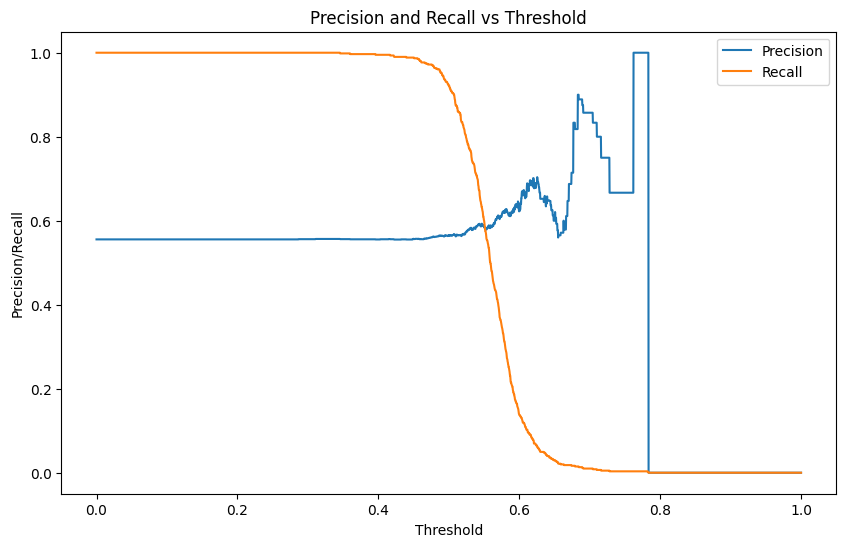

In [23]:
# Initialize lists to store precision and recall values
precision_list = []
recall_list = []
threshold_list = np.linspace(0, 1, 3000)  # 3000 thresholds from 0 to 1

for threshold in threshold_list:
    # Convert probabilities to binary predictions based on the threshold
    y_pred_threshold = (y_probs >= threshold).astype(int)
    
    # Calculate precision and recall using sklearn functions
    precision = precision_score(y, y_pred_threshold, zero_division=0)
    recall = recall_score(y, y_pred_threshold, zero_division=0)
    
    # Append precision and recall to lists
    precision_list.append(precision)
    recall_list.append(recall)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_list, precision_list, label='Precision')
plt.plot(threshold_list, recall_list, label='Recall')
plt.title('Precision and Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

### c) Recall means TP/(TP+FN). If threshold increases, the model will predict the less number of positive prediction. Then, we will have a smaller number of TP and a number of FN. This makes Recall decrease when threshold increases.
### Precision means TP/(TP+FP).  If threshold increases, the model will predict the less number of positive prediction. Then, we will have a smaller number of TP and FP. This makes Precision change depends on the decreasing of TP and FP when threshold increases. However, when the threshold is very high until there is no positive prediction, we will get Precision = 0/0 which is undifined number.

In [26]:
# Filter the data to include only years up to and including 2008
df_2008 = df[df['Year'] <= 2008]

# Select Lag2 as the predictor
X_2008 = df_2008[['Lag2']]

# Target variable
y_2008 = df_2008['Direction']

# Fit the logistic regression model
logit_model_lag2 = LogisticRegression()
logit_model_lag2.fit(X_2008, y_2008)

# Coefficients and intercept
coefficients_lag2 = logit_model_lag2.coef_[0]
intercept_lag2 = logit_model_lag2.intercept_[0]

# Output the coefficients and intercept
print('Coefficients for Lag2:', coefficients_lag2)
print('Intercept:', intercept_lag2)


Coefficients for Lag2: [0.05804742]
Intercept: 0.20326235542995563


### d) The new model (coefficient of Lag2 and intercept) was displayed above.

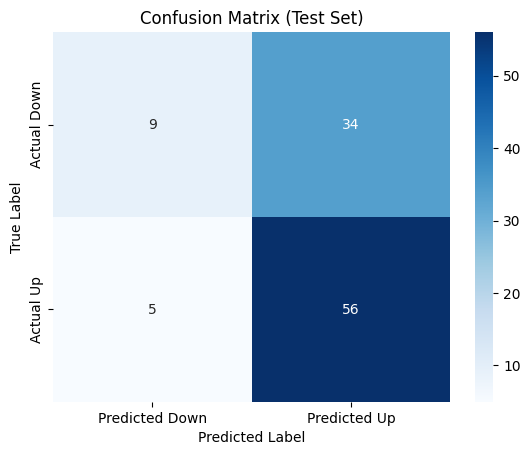

Test Set Performance Metrics:
Accuracy: 0.625
Precision: 0.6222222222222222
Recall: 0.9180327868852459
F1 Score: 0.7417218543046358


In [25]:
# Filter the data for test set
df_test = df[df['Year'] > 2008]
X_test = df_test[['Lag2']]
y_test = df_test['Direction']

# Make predictions on the test set
y_pred_test = logit_model_lag2.predict(X_test)

# Calculate the confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Visualize confusion matrix with Seaborn
sns.heatmap(conf_matrix_test, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Predicted Down', 'Predicted Up'], 
            yticklabels=['Actual Down', 'Actual Up'])

plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate other performance metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, zero_division=0)
recall_test = recall_score(y_test, y_pred_test, zero_division=0)
f1_test = f1_score(y_test, y_pred_test, zero_division=0)

# Output the performance metrics
print('Test Set Performance Metrics:')
print('Accuracy:', accuracy_test)
print('Precision:', precision_test)
print('Recall:', recall_test)
print('F1 Score:', f1_test)


### e) Test set confusion metrix and performance metrics were displayed above.

### f) Overall, the simplified model (only Lag2) outperformed the original model in terms of performance metrics. However, I will choose the original model since it is more generalized and can adapt to unseen data in the future more than the simplified model. The simplified model's performance might outperform the other model in some period but it cannot conclude that the simplified model is the better model in the future.